In [1]:
from src.c_country import C_Country
from utils.hypergraph_generator import get_hypergraph


import csv
import json
import numpy as np
import pandas as pd
import networkx as nx
import random as rnd

import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme(style="whitegrid")

import multiprocessing
from subprocess import Popen, STDOUT, PIPE
import copy
import time

In [2]:
args = {
    "--beta": 0.2,
    "--seed": 0,
    "--sigma": 1.0, 
    "--mu": 0.2,
    "--max_sim": 1000,
    "inf_agent_num":5,
}
args["procnum"] = 10
args["simnum"] = 5

## Barabási-Albert modell

In [3]:
start = time.time()
H=get_hypergraph('barabasi', args={'n' : 5000, 'm':1, 'distribution': 'uniform','size':4})
print('running time: ' + str(time.time() - start))

running time: 37.3547739982605


In [4]:
betas=[0.01,0.05,0.1,0.15,0.2]

In [5]:
h=C_Country(H)
node_num = h.node_num

In [6]:
nodes = [node for node in H.nodes]

In [7]:
start = time.time()
res = {}
pool = multiprocessing.Pool(processes=args["procnum"])
manager = multiprocessing.Manager()
lock = manager.Lock()
str_h=h.get_str_hypergraph()

job_count = manager.Array("i", [0,len(betas)*args["simnum"]])
for beta in betas:
    res[beta]=[]
    for i in range(args["simnum"]):
        act_args = copy.copy(args)
        act_args["--seed"]=i
        act_args["--beta"]=beta
        inf_nodes = np.random.choice(nodes, size = args['inf_agent_num'], replace = False)
        history1 = pool.apply_async(C_Country.run, args =
                       (act_args, str_h, node_num, job_count, lock,
                        inf_nodes))
        #history1 = hun.run(args, inf_area)
        res[beta].append(history1)
pool.close()
pool.join()
#print('') # After logging
for beta in betas:
    res[beta] = [t1.get() for t1 in res[beta]]
print(' running time: ' + str(time.time() - start))

 25/25 running time: 25.826513051986694


In [8]:
res

{0.01: [(array([[4995,    0,    5,    0],
          [4995,    0,    5,    0],
          [4995,    0,    5,    0],
          [4995,    0,    5,    0],
          [4995,    0,    5,    0],
          [4995,    0,    5,    0],
          [4994,    0,    4,    2],
          [4994,    0,    4,    2],
          [4994,    0,    4,    2],
          [4994,    0,    3,    3],
          [4994,    0,    0,    6]]),
   array([], dtype=float64)),
  (array([[4995,    0,    5,    0],
          [4995,    0,    5,    0],
          [4995,    0,    4,    1],
          [4995,    0,    3,    2],
          [4995,    0,    3,    2],
          [4995,    0,    3,    2],
          [4995,    0,    3,    2],
          [4995,    0,    3,    2],
          [4995,    0,    3,    2],
          [4994,    0,    4,    2],
          [4994,    0,    4,    2],
          [4994,    0,    4,    2],
          [4994,    0,    3,    3],
          [4994,    0,    3,    3],
          [4994,    0,    2,    4],
          [4994,    0,    

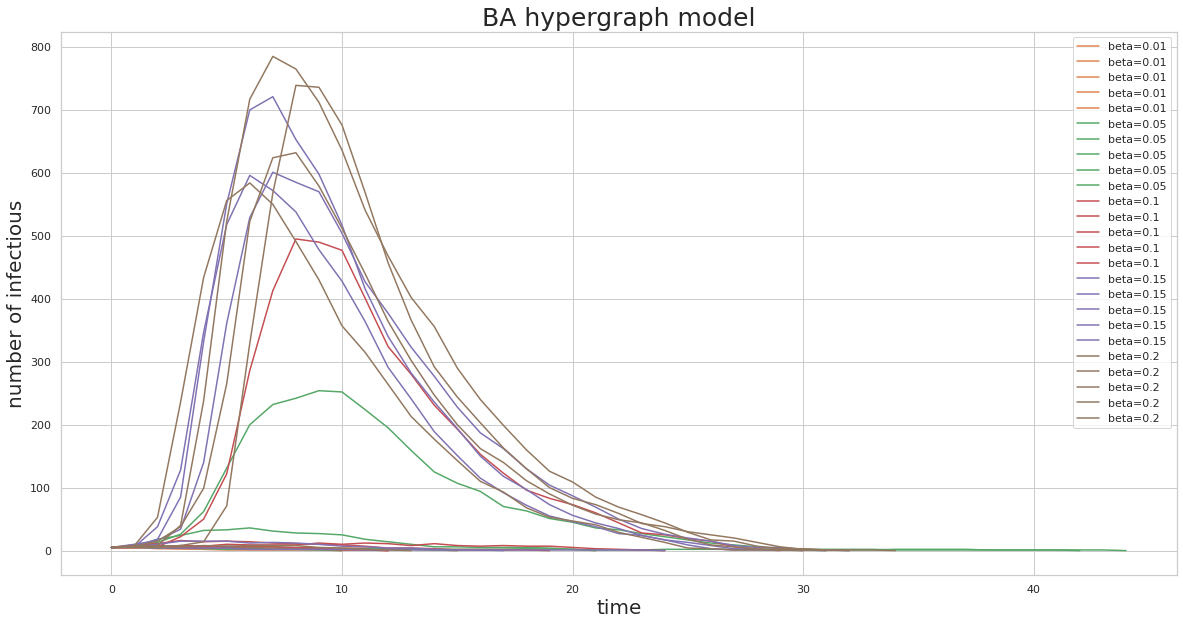

In [11]:
colors=['C1','C2','C3','C4','C5','C6']
plt.figure(figsize=(20,10))
plt.title('BA hypergraph model', fontsize=25)
for beta_i,beta in enumerate(betas):
    for j in range(args['simnum']):
        plt.plot([res[beta][j][0][i][2] for i in range(len(res[beta][j][0]))], color=colors[beta_i],label=f'beta={beta}')
plt.xlabel('time', fontsize=20)
plt.ylabel('number of infectious', fontsize=20)
plt.legend()
plt.show()

## Erdős-Rényi model

In [12]:
start = time.time()
ER=get_hypergraph('erdos-renyi', args={'n' : 5000, 'm':5000, 'distribution': 'uniform','size':4})
print('running time: ' + str(time.time() - start))

running time: 41.74560737609863


In [13]:
h=C_Country(ER)
node_num = h.node_num

In [14]:
nodes = [node for node in ER.nodes]
start = time.time()
res = {}
pool = multiprocessing.Pool(processes=args["procnum"])
manager = multiprocessing.Manager()
lock = manager.Lock()
str_h=h.get_str_hypergraph()

job_count = manager.Array("i", [0,len(betas)*args["simnum"]])
for beta in betas:
    res[beta]=[]
    for i in range(args["simnum"]):
        act_args = copy.copy(args)
        act_args["--seed"]=i
        act_args["--beta"]=beta
        inf_nodes = np.random.choice(nodes, size = args['inf_agent_num'], replace = False)
        history1 = pool.apply_async(C_Country.run, args =
                       (act_args, str_h, node_num, job_count, lock,
                        inf_nodes))
        #history1 = hun.run(args, inf_area)
        res[beta].append(history1)
pool.close()
pool.join()
#print('') # After logging
for beta in betas:
    res[beta] = [t1.get() for t1 in res[beta]]
print(' running time: ' + str(time.time() - start))

 25/25 running time: 26.214760541915894


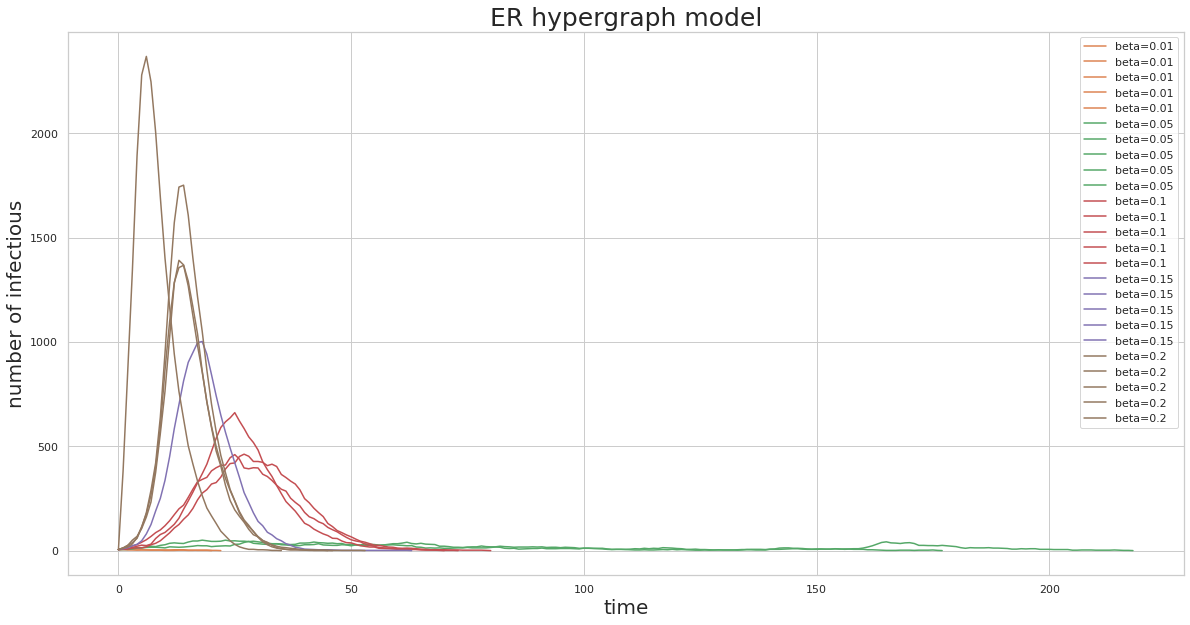

In [16]:
colors=['C1','C2','C3','C4','C5','C6']
plt.figure(figsize=(20,10))
plt.title('ER hypergraph model', fontsize=25)
for beta_i,beta in enumerate(betas):
    for j in range(args['simnum']):
        plt.plot([res[beta][j][0][i][2] for i in range(len(res[beta][j][0]))], color=colors[beta_i],label=f'beta={beta}')
plt.xlabel('time', fontsize=20)
plt.ylabel('number of infectious', fontsize=20)
plt.legend()
plt.show()

In [21]:
start = time.time()
R=get_hypergraph('regular', args={'n' : 5000, 'd':5, 'distribution': 'uniform','size':4})
print('running time: ' + str(time.time() - start))

running time: 58.80958938598633


In [ ]:
h=C_Country(R)
node_num = h.node_num
nodes = [node for node in ER.nodes]
start = time.time()
res = {}
pool = multiprocessing.Pool(processes=args["procnum"])
manager = multiprocessing.Manager()
lock = manager.Lock()
str_h=h.get_str_hypergraph()

job_count = manager.Array("i", [0,len(betas)*args["simnum"]])
for beta in betas:
    res[beta]=[]
    for i in range(args["simnum"]):
        act_args = copy.copy(args)
        act_args["--seed"]=i
        act_args["--beta"]=beta
        inf_nodes = np.random.choice(nodes, size = args['inf_agent_num'], replace = False)
        history1 = pool.apply_async(C_Country.run, args =
                       (act_args, str_h, node_num, job_count, lock,
                        inf_nodes))
        #history1 = hun.run(args, inf_area)
        res[beta].append(history1)
pool.close()
pool.join()
#print('') # After logging
for beta in betas:
    res[beta] = [t1.get() for t1 in res[beta]]
print(' running time: ' + str(time.time() - start))

In [ ]:
colors=['C1','C2','C3','C4','C5','C6']
plt.figure(figsize=(20,10))
plt.title('Regular hypergraph model', fontsize=25)
for beta_i,beta in enumerate(betas):
    for j in range(args['simnum']):
        plt.plot([res[beta][j][0][i][2] for i in range(len(res[beta][j][0]))], color=colors[beta_i],label=f'beta={beta}')
plt.xlabel('time', fontsize=20)
plt.ylabel('number of infectious', fontsize=20)
plt.legend()
plt.show()